# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
from wordcloud import WordCloud

**Loading the dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving COVID clinical trials.csv to COVID clinical trials.csv


In [3]:
data_df=pd.read_csv('COVID clinical trials.csv')

**Displaying first 5 rows**

In [4]:
data_df.head(5)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


**Checking rows and columns**

In [5]:
data_df.shape

(5783, 27)

**Checking Data Information**

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

**Summary of numerical columns**

In [7]:
data_df.describe()

,Rank,Enrollment
count,5783.000000,5.749000e+03
mean,2892.000000,1.831949e+04
std,1669.552635,4.045437e+05
min,1.000000,0.000000e+00
25%,1446.500000,6.000000e+01
50%,2892.000000,1.700000e+02
75%,4337.500000,5.600000e+02
max,5783.000000,2.000000e+07


**Basic description of non-numeric values**

In [8]:
data_df.describe(include='object')

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
count,5783,5783,2480,5783,5783,5783,4897,5748,5783,5773,...,5782,5749,5747,5747,5783,36,5783,5198,182,5783
unique,5783,5775,2338,12,2,3067,4337,5687,3631,3,...,5734,654,877,978,438,33,269,4255,182,5783
top,NCT04680000,Acalabrutinib Study With Best Supportive Care ...,COVID-19,Recruiting,No Results Available,COVID-19,Other: No intervention,Mortality,Assistance Publique - Hôpitaux de Paris,All,...,COVID-19,"May 1, 2020","December 31, 2020","December 31, 2021","April 24, 2020","November 4, 2020","April 8, 2021","Uhmontpellier, Montpellier, France","""Statistical Analysis Plan"", https://ClinicalT...",https://ClinicalTrials.gov/show/NCT04680000
freq,1,2,47,2805,5747,720,32,5,78,5567,...,6,113,122,179,108,2,109,19,1,1


# **Data Preprocessing**

**Checking for missing values**

In [9]:
data_df.isnull().sum()

,0
Rank,0
NCT Number,0
Title,0
Acronym,3303
Status,0
Study Results,0
Conditions,0
Interventions,886
Outcome Measures,35
Sponsor/Collaborators,0


In [10]:
missing_data = data_df.isnull().mean() * 100
missing_data

,0
Rank,0.000000
NCT Number,0.000000
Title,0.000000
Acronym,57.115684
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,15.320768
Outcome Measures,0.605222
Sponsor/Collaborators,0.000000


**Percentage of Missing Data in Each Feature**

In [11]:
# Visualize data without calculating
def visualize_data(data , caption = '' , ylabel = 'Percentage of Missing Data'):
  # set figure size
  sns.set(rc={'figure.figsize':(12,5)})
  # make ticks vertical
  plt.xticks(rotation=90)
  # set title to the image and plot it or the highest 40
  fig = sns.barplot(x = data.keys()[:min(40 , len(data))].tolist(),
                    y = data.values[: min(40 ,len(data))].tolist()) \
                    .set_title(caption)
  # set labels
  plt.ylabel(ylabel)
  plt.show()

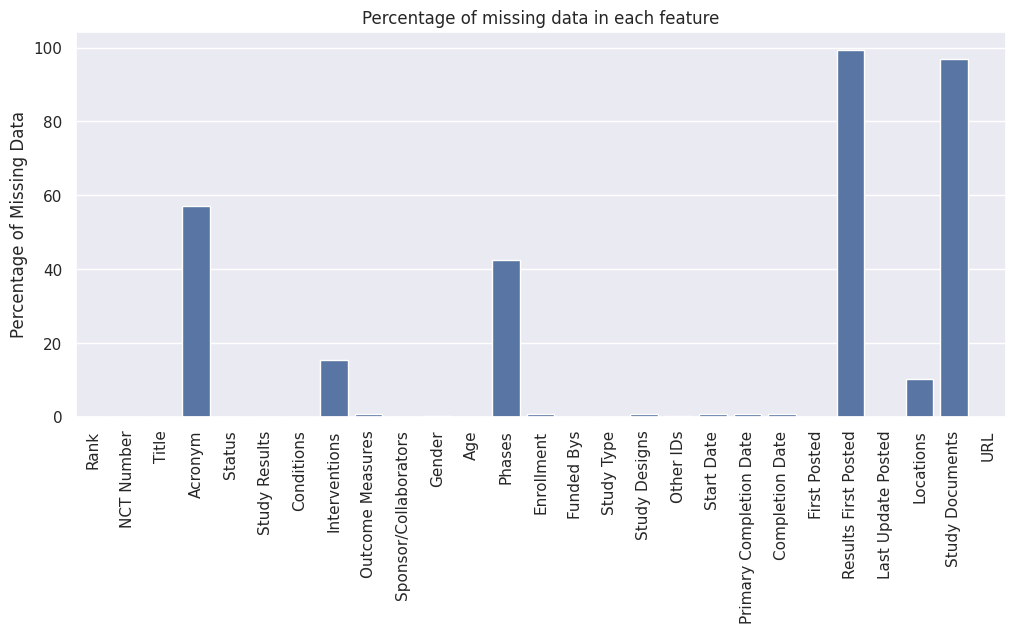

In [12]:
visualize_data(missing_data, 'Percentage of missing data in each feature')

**Dropping Columns**

In [13]:
covid_df = data_df.drop(columns=['Acronym',  'URL', 'Study Documents', 'Results First Posted'])

# **Feature Engineering**

In [14]:
# Convert date columns to datetime format
date_columns = ["Start Date", "Primary Completion Date", "Completion Date", "First Posted", "Last Update Posted"]
for col in date_columns:
    covid_df[col] = pd.to_datetime(covid_df[col], errors='coerce')

# Extract country information from Locations column
covid_df["Country"] = covid_df["Locations"].str.extract(r'([A-Za-z ]+)$')

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Rank                     5783 non-null   int64         
 1   NCT Number               5783 non-null   object        
 2   Title                    5783 non-null   object        
 3   Status                   5783 non-null   object        
 4   Study Results            5783 non-null   object        
 5   Conditions               5783 non-null   object        
 6   Interventions            4897 non-null   object        
 7   Outcome Measures         5748 non-null   object        
 8   Sponsor/Collaborators    5783 non-null   object        
 9   Gender                   5773 non-null   object        
 10  Age                      5783 non-null   object        
 11  Phases                   3322 non-null   object        
 12  Enrollment               5749 non-

# **Univariate Analysis**

**Distribution of Clinical Trial Phases**

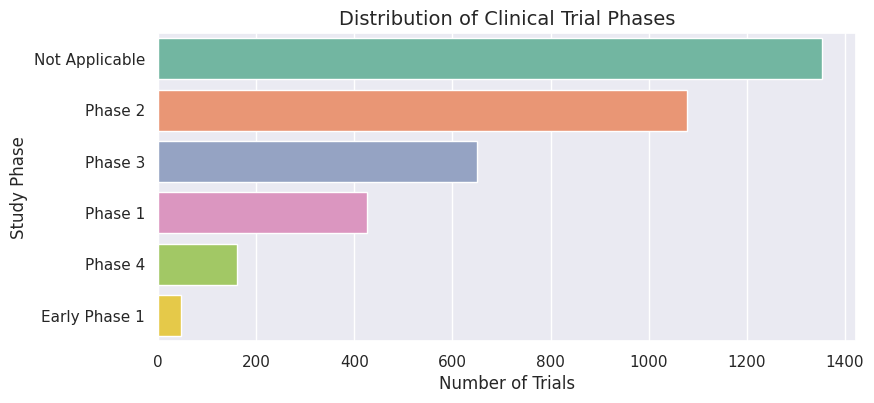

In [15]:
# Count occurrences of each study phase
phase_counts = covid_df["Phases"].dropna().str.split("|").explode().value_counts()

# Plot the distribution
plt.figure(figsize=(9, 4))
sns.barplot(y=phase_counts.index, x=phase_counts.values, hue=phase_counts.index, palette="Set2", legend= False)
plt.title("Distribution of Clinical Trial Phases", fontsize=14)
plt.xlabel("Number of Trials")
plt.ylabel("Study Phase")
plt.show()

**Clinical Trial Phases Distribution**

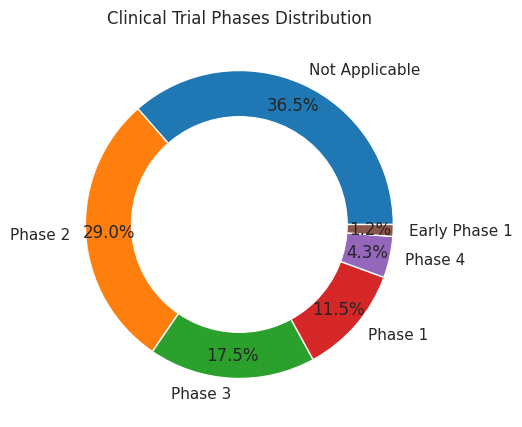

In [16]:
plt.figure(figsize=(5,5))
plt.pie(phase_counts, labels=phase_counts.index, autopct='%1.1f%%', pctdistance=0.85, colors=sns.color_palette("tab10", len(phase_counts)))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.title("Clinical Trial Phases Distribution")
plt.show()

**Distribution of Clinical Trial Status**

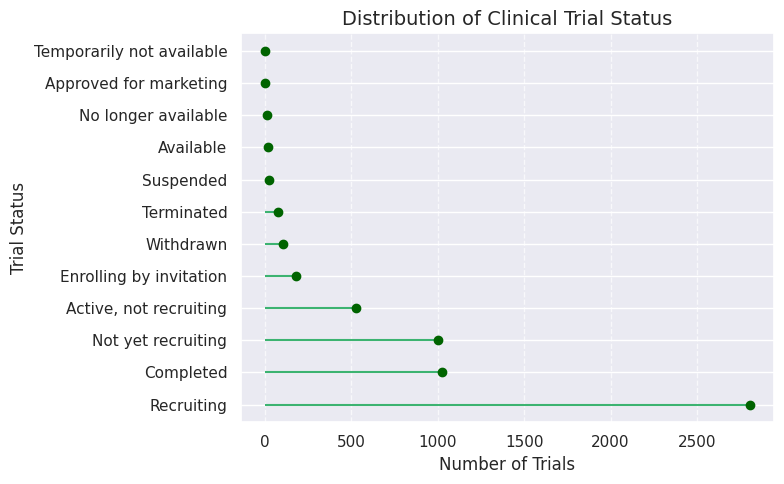

In [17]:
# Count trials by status
status_counts = covid_df["Status"].value_counts()

plt.figure(figsize=(8, 5))
plt.hlines(y=status_counts.index, xmin=0, xmax=status_counts.values, color='mediumseagreen')
plt.plot(status_counts.values, status_counts.index, "o", color='darkgreen')
plt.title("Distribution of Clinical Trial Status", fontsize=14)
plt.xlabel("Number of Trials")
plt.ylabel("Trial Status")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Enrollment Size Across Different Age Groups**

<ipython-input-18-020b57615dd8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=covid_df["Age"], y=covid_df["Enrollment"], palette="viridis")


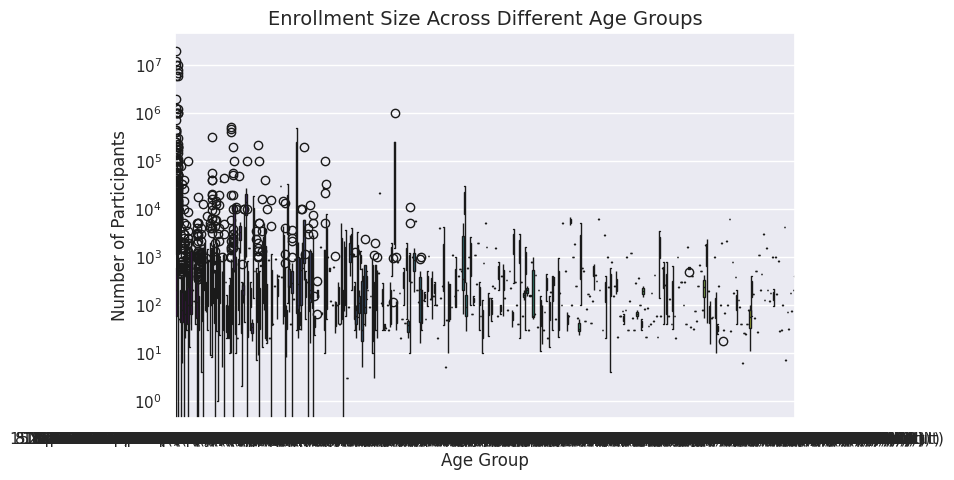

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=covid_df["Age"], y=covid_df["Enrollment"], palette="viridis")
plt.title("Enrollment Size Across Different Age Groups", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Participants")
plt.yscale("log")  # Log scale to handle large variations
plt.show()

# **Bivariate Analysis**

**Status VS. Phases of Clinical Trials**

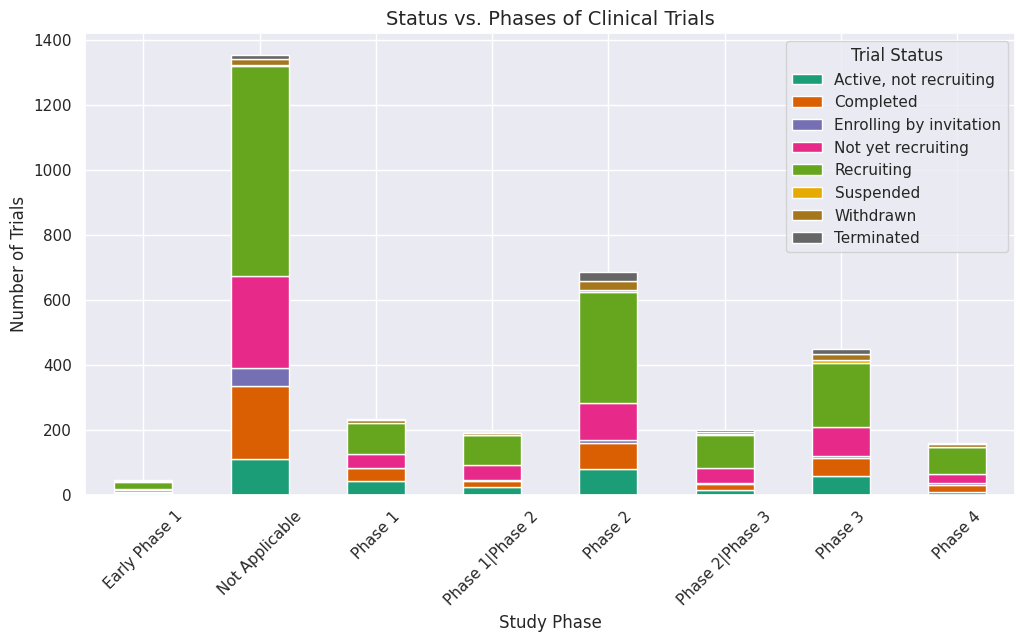

In [19]:
#Count trials by Phase and Status
status_phase_counts =covid_df.groupby(["Phases", "Status"]).size().unstack()

# Plot
status_phase_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Dark2")
plt.title("Status vs. Phases of Clinical Trials", fontsize=14)
plt.xlabel("Study Phase")
plt.ylabel("Number of Trials")
plt.legend(title="Trial Status")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Convert categorical columns to a contingency table
status_phase_pivot = covid_df.pivot_table(index="Phases", columns="Status", aggfunc="size", fill_value=0)

**Heatmap: Status VS. Phases of Clinical Trials**

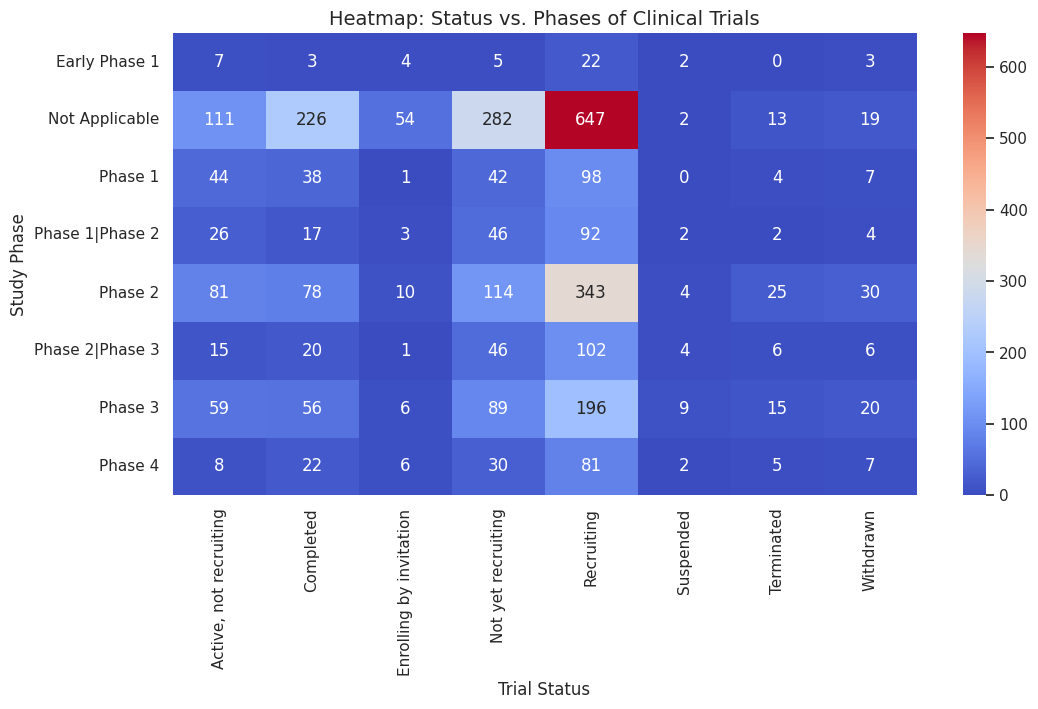

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(status_phase_pivot, cmap="coolwarm", annot=True, fmt="d")
plt.title("Heatmap: Status vs. Phases of Clinical Trials", fontsize=14)
plt.xlabel("Trial Status")
plt.ylabel("Study Phase")
plt.show()

**Word Cloud of Clinical Trial Conditions**

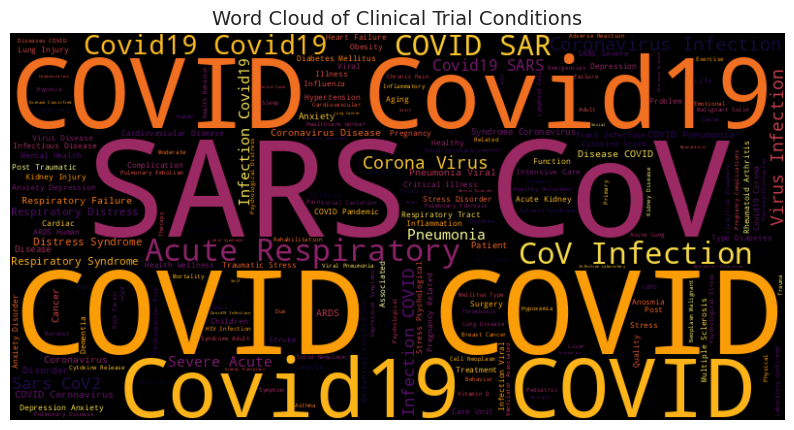

In [24]:
# Combine all conditions into a single string
text = " ".join(covid_df["Conditions"].dropna())

# Generate word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="inferno").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Clinical Trial Conditions", fontsize=14)
plt.show()

**Number of Unique Outcome Measures for Top Conditions**

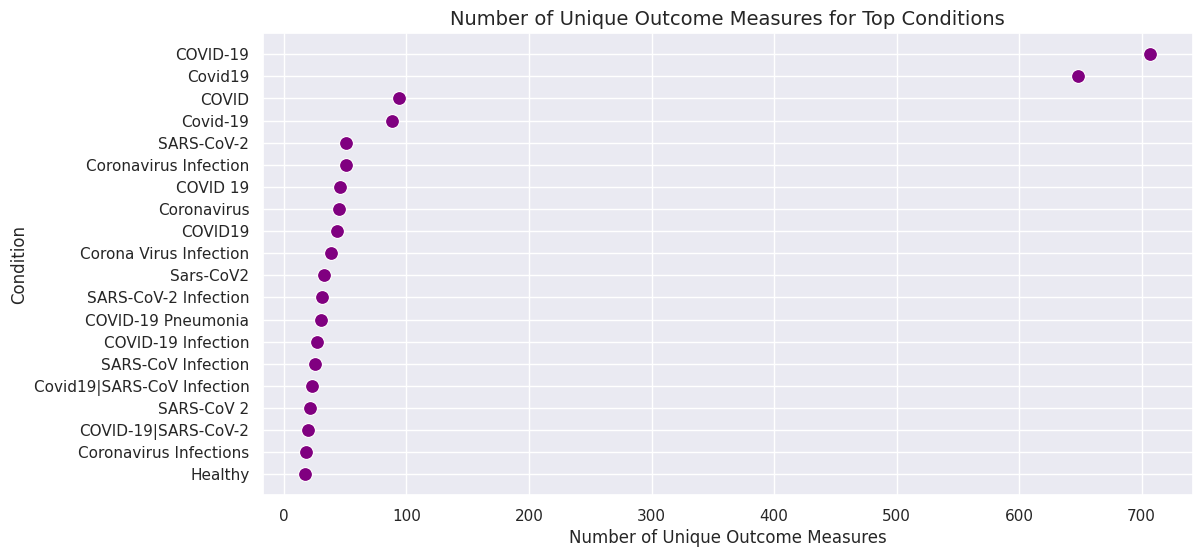

In [23]:
# Count unique outcome measures per condition
outcome_counts = covid_df.groupby("Conditions")["Outcome Measures"].nunique().reset_index()
outcome_counts = outcome_counts.sort_values(by="Outcome Measures", ascending=False).head(20)  # Top 20 conditions

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(y=outcome_counts["Conditions"], x=outcome_counts["Outcome Measures"], color="purple", s=100)
plt.title("Number of Unique Outcome Measures for Top Conditions", fontsize=14)
plt.xlabel("Number of Unique Outcome Measures")
plt.ylabel("Condition")
plt.grid(True)
plt.show()

# **Time Series**

**COVID-19 Clinical Trials Over Time**

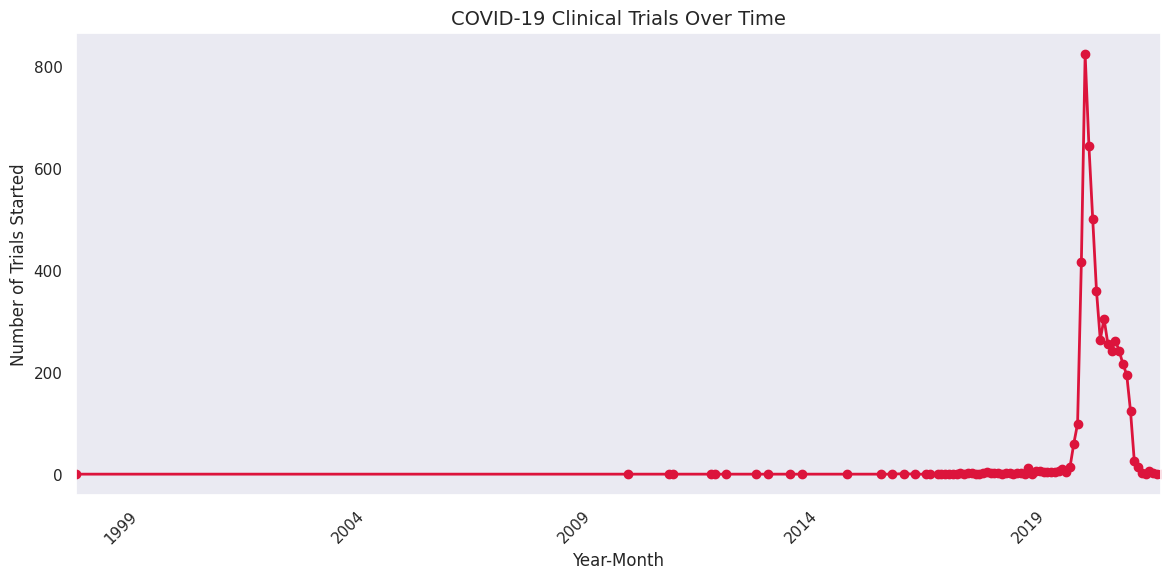

In [25]:
covid_df["Start Date"] = pd.to_datetime(covid_df["Start Date"], errors='coerce')
covid_df["Year-Month"] = covid_df["Start Date"].dt.to_period("M")

# Count trials per month
trials_per_month = covid_df["Year-Month"].value_counts().sort_index()

# Plot trend of trials over time
plt.figure(figsize=(14, 6))
trials_per_month.plot(kind="line", marker="o", color="crimson", linewidth=2)
plt.title("COVID-19 Clinical Trials Over Time", fontsize=14)
plt.xlabel("Year-Month")
plt.ylabel("Number of Trials Started")
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Top 10 Most Common Conditions and Interventions in COVID-19 Clinical Trials**

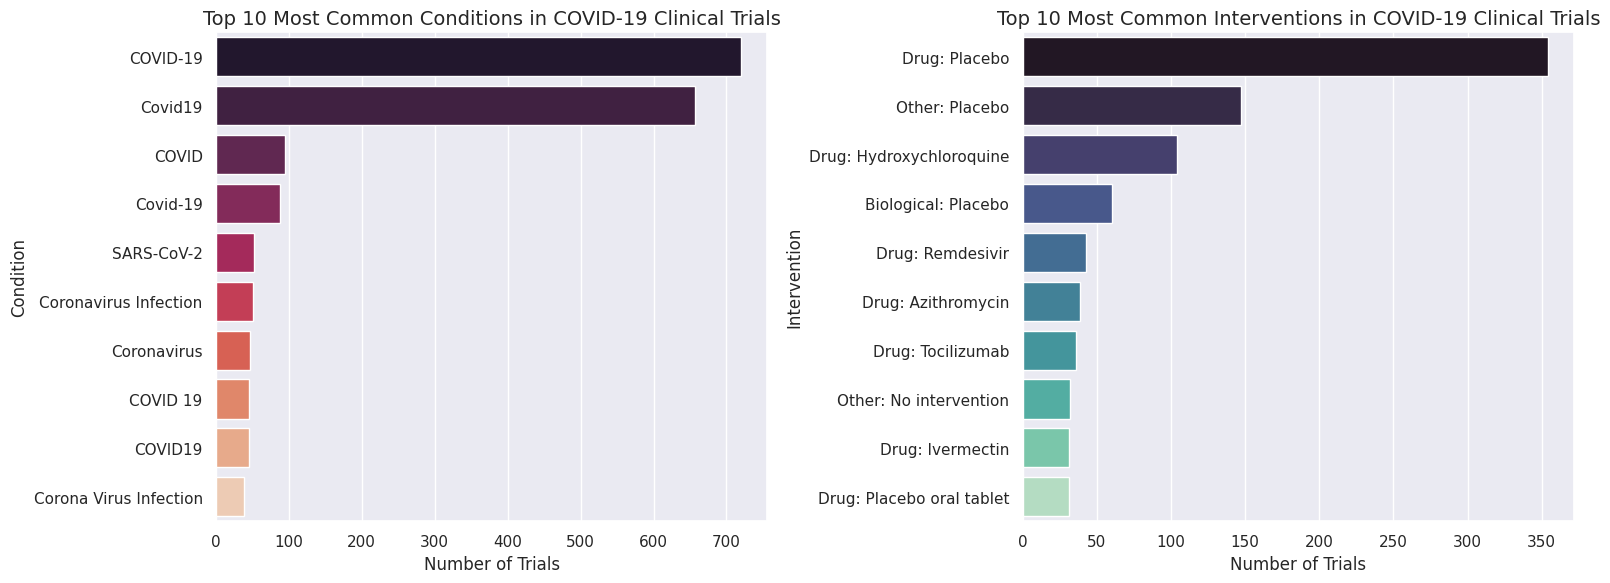

In [26]:
# Most common conditions studied in clinical trials
top_conditions = covid_df["Conditions"].value_counts().nlargest(10)

# Most common interventions used in clinical trials
top_interventions =covid_df["Interventions"].dropna().str.split("|").explode().value_counts().nlargest(10)

# Plot the most common conditions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(y=top_conditions.index, x=top_conditions.values,hue= top_conditions.index, palette="rocket", ax=axes[0])
axes[0].set_title("Top 10 Most Common Conditions in COVID-19 Clinical Trials", fontsize=14)
axes[0].set_xlabel("Number of Trials")
axes[0].set_ylabel("Condition")

# Plot the most common interventions
sns.barplot(y=top_interventions.index, x=top_interventions.values,hue= top_interventions.index, palette="mako", ax=axes[1])
axes[1].set_title("Top 10 Most Common Interventions in COVID-19 Clinical Trials", fontsize=14)
axes[1].set_xlabel("Number of Trials")
axes[1].set_ylabel("Intervention")

plt.tight_layout()
plt.show()

**Top 10 Sponsors of COVID-19 Clinical Trials**

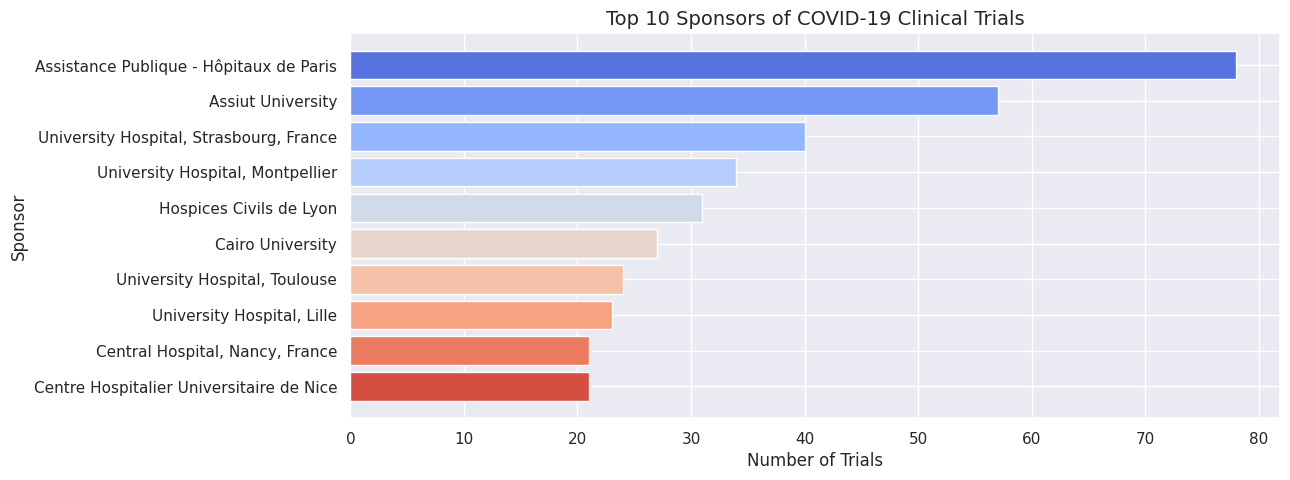

In [27]:
# Count trials by sponsor
top_sponsors = covid_df["Sponsor/Collaborators"].value_counts().nlargest(10)

# Generate a color palette
colors = sns.color_palette("coolwarm", n_colors=len(top_sponsors))

# Plot
plt.figure(figsize=(12, 5))
bars = plt.barh(y=top_sponsors.index, width=top_sponsors.values, color=colors)
plt.title("Top 10 Sponsors of COVID-19 Clinical Trials", fontsize=14)
plt.xlabel("Number of Trials")
plt.ylabel("Sponsor")
plt.gca().invert_yaxis()  # Most trials at the top
plt.show()

**Top 10 Countries Hosting COVID-19 Clinical Trials**

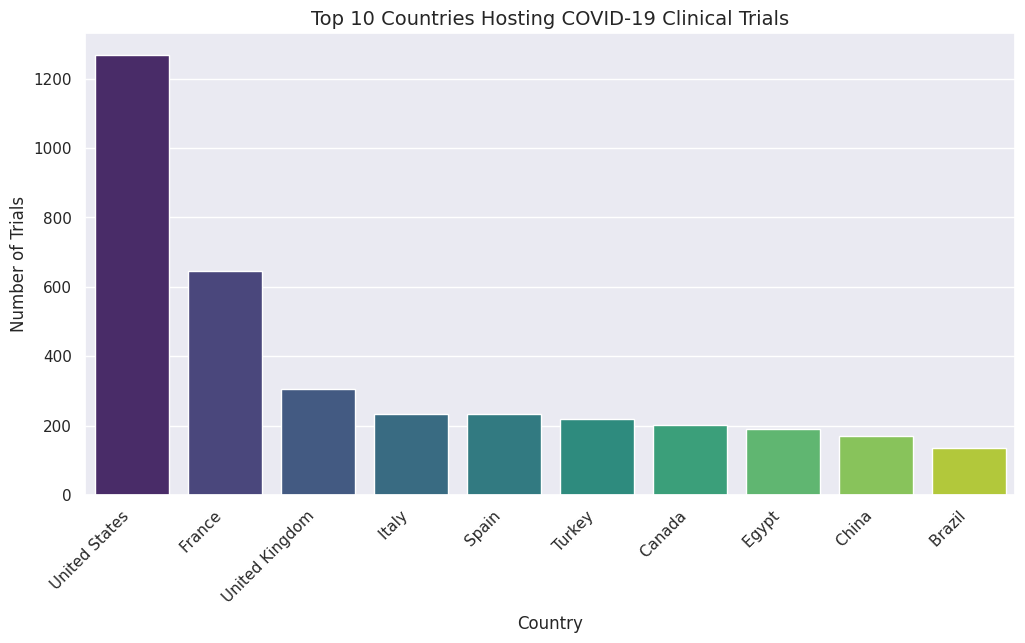

In [28]:
# Count trials per country
top_countries = covid_df["Country"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,hue=top_countries.index, palette="viridis",legend=False )
plt.title("Top 10 Countries Hosting COVID-19 Clinical Trials", fontsize=14)
plt.ylabel("Number of Trials")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.show()

**Distribution of Enrollment Sizes in Clinical Trials**

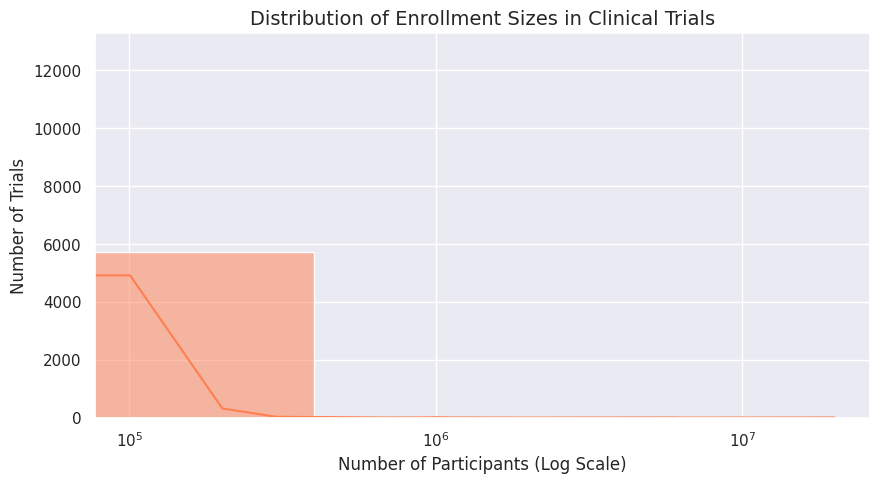

In [29]:
# Plot enrollment distribution (log scale for better visualization)
plt.figure(figsize=(10, 5))
sns.histplot(covid_df["Enrollment"].dropna(), bins=50, kde=True, color="coral")
plt.xscale("log")
plt.title("Distribution of Enrollment Sizes in Clinical Trials", fontsize=14)
plt.xlabel("Number of Participants (Log Scale)")
plt.ylabel("Number of Trials")
plt.show()